# Figure 6d and Supplementary Figure 9

## Install and read the R packages

In [ ]:
install.packages("data.table")
install.packages("TDAstats")
install.packages("gridExtra")
library(data.table)
library(TDAstats)
library(tidyverse)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Download and read the persistence diagram data in Figure 6d and Supplementary Figure 9

In [ ]:
system("wget https://www.dropbox.com/s/zpx9w9wnu3p7n29/persistence_diagram.zip")
system("unzip /content/persistence_diagram.zip")
files <- list.files("/content/persistence_diagram",full.names=TRUE)
files <- files[grep("control|saline|bleomycin",files)]
file1 <- files[grep("pd1",files)]
file2 <- files[grep("pd2",files)]

## Figure 6d and Supplementary Figure 9

In [ ]:
out1 <- paste0("fig6d_",gsub("-pd1\\.txt","",basename(file1)),".tsv")
out2 <- paste0("fig6d_",gsub("-pd1\\.txt","",basename(file1)),".pdf")
p <- vector("list",length(file1))
filenames <- gsub("-pd1\\.txt","",basename(file1))
for(i in 1:length(file1)){
  cat(i,"/",length(file1),"\n")
  junk <- rbind(cbind(1,as.matrix(fread(file1[i],sep=" ",header=FALSE))),
                        cbind(2,as.matrix(fread(file2[i],sep=" ",header=FALSE))))
  colnames(junk) <- c("dimension","birth","death")
  write.table(junk,out1[i],row.names=FALSE,col.names=TRUE,sep="\t",quote=FALSE)
  p[[i]] <- plot_persist(junk) +
            ggtitle(filenames[i]) +
            theme(plot.title = element_text(hjust = 0.3))
}

1 / 15 
2 / 15 
3 / 15 
4 / 15 
5 / 15 
6 / 15 
7 / 15 
8 / 15 
9 / 15 
10 / 15 
11 / 15 
12 / 15 
13 / 15 
14 / 15 
15 / 15 


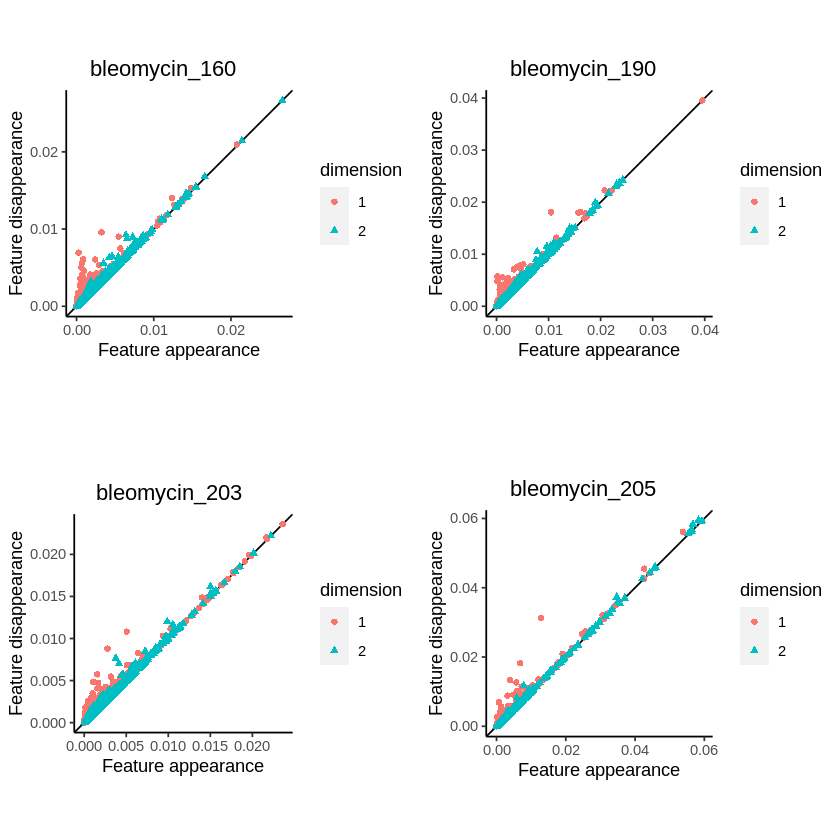

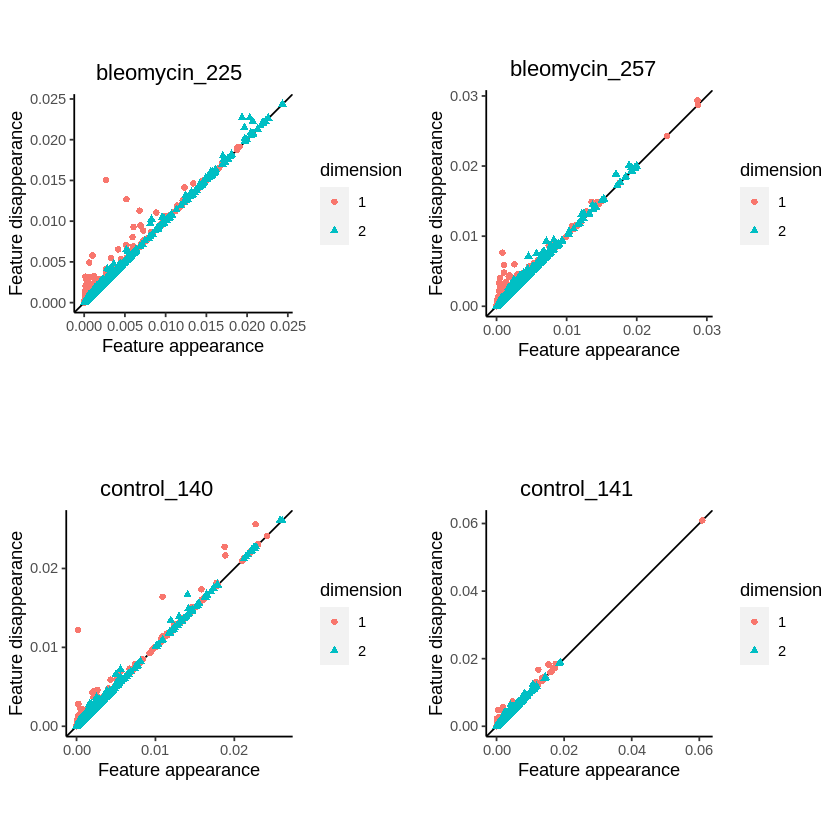

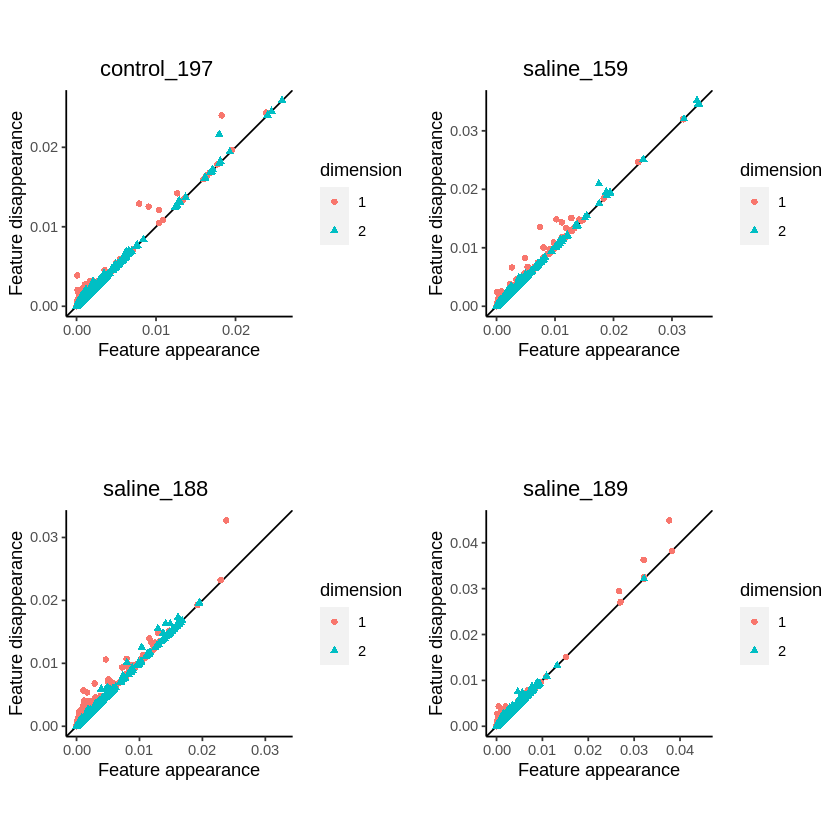

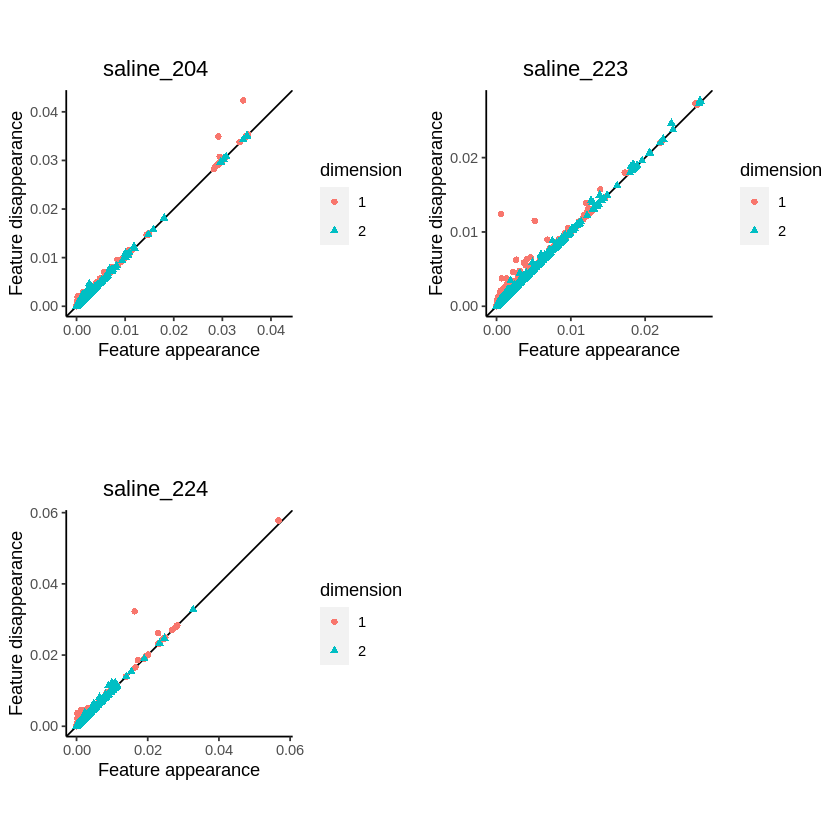

In [ ]:
grid.arrange(p[[1]], p[[2]],
p[[3]], p[[4]], nrow = 2)
grid.arrange(p[[5]], p[[6]],
p[[7]], p[[8]], nrow = 2)
grid.arrange(p[[9]], p[[10]],
p[[11]], p[[12]], nrow = 2)
grid.arrange(p[[13]], p[[14]],
p[[15]], nrow = 2)